In [1]:
#data["centroids"][frame_number][sperm_number]["desired_info_on_sperm"]
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


#I used the path for my PC i expect there is a better way to do it from github
#if anyone knows how to do that
with open(r"C:\Users\richa\Desktop\Univecity projects\MDM3 B\mojo_sperm_tracking_data_bristol\tp49\cover0_0_YOLO_NO_TRACKING_output\centroids_with_meta.json", "r") as read_file:
    data = json.load(read_file)

#Data is in form of a dict

#First classsification is either data["centroids"] or data["extra_information"]
#The key "extra_information" only contains the resize factor
# The key "centroids" provides a list where the index is the desired frame number of the video

#For video cover_0_0 there are 301 frames 

#For each frame number i, there is a set number of sperms
# len(data["centroids"][i]) will give the number of sperms in frame i (this changes across frames)

#For each sperm detected in a given frame, there is a dictionary containing
#the following info :
#- a box containing sperm head ("bbox")--> list of 4 values representing points of a rectangle, 
#- the position of the center of the sperm head ("center") --> list of x and y coordinate,
# the class("class"),
#(which i expect is whether the detected object is a sperm or not because it looks like it is always set to 1)
#- whether it was interpolated (Set false for all) ("interpolated"),
#- A sperm ID (which for now is unique for all sperms) ("id")

#My understanding is that once we have recognised two sperm points over two frames
# to be the same sperm, the one in the latest frame will be set to have the same ID and have an interpolated value of True

#Overall, the relevant data is in form
#data["centroids"][frame_number][sperm_number]["desired_info_on_sperm"]




#Therefore : the position of the center of the first sperm's head in the first frame will be
#data["centroids"][frame_number][sperm_number]["desired_info_on_sperm"]
print(data["centroids"][0][0]["center"])

print(len(data["centroids"][153]))


[337.25, 221.0]
11


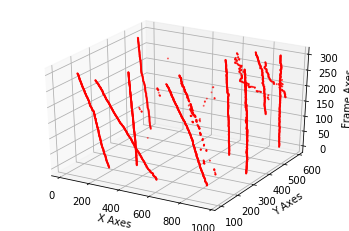

In [3]:

x_values = []
y_values = []
frame_values=[]
#Plotting all positions of center of sperm heads for video 0
for i in range(0,len(data["centroids"])): # number of frames
    for j in range(0,len(data["centroids"][i])): #number of sperms in frame
        x_values.append(data["centroids"][i][j]["center"][0])
        y_values.append(data["centroids"][i][j]["center"][1])
        frame_values.append(i)

#2D  - Various positions of all sperm heads for all frames
#plt.scatter(x_values,y_values,s=1)

#3D - adding frame dimension (can be converted to time with FPS value)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x_values,y_values,frame_values,color='r',s=1)
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')

plt.show()


In [27]:
# Detects when there is a different sprem number between frames
for i in range(0,len(data["centroids"])): # number of frames
    if abs(len(data["centroids"][i]) - len(data["centroids"][i-1])) >= 1: # If the number of sperm is different of the prevoius frame.
        print("Frame:", i)
        print("Number of new Sperms:",len(data["centroids"][i]) - len(data["centroids"][i-1]))
        print("Sperm number:", len(data["centroids"][i]), "\n")

Frame: 0
Number of new Sperms: -2
Sperm number: 10 

Frame: 3
Number of new Sperms: -1
Sperm number: 9 

Frame: 6
Number of new Sperms: 2
Sperm number: 11 

Frame: 7
Number of new Sperms: -1
Sperm number: 10 

Frame: 9
Number of new Sperms: -1
Sperm number: 9 

Frame: 13
Number of new Sperms: 1
Sperm number: 10 

Frame: 15
Number of new Sperms: 1
Sperm number: 11 

Frame: 17
Number of new Sperms: -1
Sperm number: 10 

Frame: 21
Number of new Sperms: -1
Sperm number: 9 

Frame: 25
Number of new Sperms: 1
Sperm number: 10 

Frame: 26
Number of new Sperms: -1
Sperm number: 9 

Frame: 43
Number of new Sperms: 1
Sperm number: 10 

Frame: 44
Number of new Sperms: -1
Sperm number: 9 

Frame: 47
Number of new Sperms: 1
Sperm number: 10 

Frame: 48
Number of new Sperms: -1
Sperm number: 9 

Frame: 53
Number of new Sperms: 1
Sperm number: 10 

Frame: 54
Number of new Sperms: -1
Sperm number: 9 

Frame: 55
Number of new Sperms: 1
Sperm number: 10 

Frame: 61
Number of new Sperms: -1
Sperm number:

In [26]:
# Detects when the diferent number of sperms is bigger than or equal to two (the number of sperms increased or decrease by >=2 in just one frame)
for i in range(0,len(data["centroids"])): # number of frames
    if abs(len(data["centroids"][i]) - len(data["centroids"][i-1])) >= 2: # If the number of sperm is different of the prevoius frame.
        print("Frame:", i)
        print("Number of new Sperms:",len(data["centroids"][i]) - len(data["centroids"][i-1]))
        print("Sperm number:", len(data["centroids"][i]), "\n")

Frame: 0
Number of new Sperms: -2
Sperm number: 10 

Frame: 6
Number of new Sperms: 2
Sperm number: 11 

Frame: 73
Number of new Sperms: -2
Sperm number: 9 

Frame: 89
Number of new Sperms: 2
Sperm number: 12 

Frame: 93
Number of new Sperms: -2
Sperm number: 10 

Frame: 97
Number of new Sperms: 2
Sperm number: 11 

Frame: 139
Number of new Sperms: 3
Sperm number: 13 

Frame: 140
Number of new Sperms: -2
Sperm number: 11 

Frame: 144
Number of new Sperms: -2
Sperm number: 10 

Frame: 176
Number of new Sperms: 2
Sperm number: 13 

Frame: 180
Number of new Sperms: 2
Sperm number: 13 

Frame: 211
Number of new Sperms: 2
Sperm number: 12 

Frame: 222
Number of new Sperms: 2
Sperm number: 14 

Frame: 231
Number of new Sperms: 2
Sperm number: 14 

Frame: 261
Number of new Sperms: 2
Sperm number: 13 

Frame: 276
Number of new Sperms: 2
Sperm number: 13 

